In [2]:
import numpy as np
# write a dft matrix w for N x N where N is the length of the signal to be multiplied later with w
N = 4
n = np.arange(N)
k = n[:, np.newaxis]
L = k*n/N
print(L) 
w = np.exp(2*np.pi*2j*k*n/N)
print(np.around(w, decimals = 2))


[[0.   0.   0.   0.  ]
 [0.   0.25 0.5  0.75]
 [0.   0.5  1.   1.5 ]
 [0.   0.75 1.5  2.25]]
[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j -1.+0.j  1.-0.j -1.+0.j]
 [ 1.+0.j  1.-0.j  1.-0.j  1.-0.j]
 [ 1.+0.j -1.+0.j  1.-0.j -1.+0.j]]


In [3]:
# DFT of a polynomial is the dot product of w and signal's coefficients representation in an array

def dft(signal):
    if len(signal) <= 1:return signal
    N = len(signal)
    n = np.arange(N)
    k = n[:, np.newaxis]
    w = np.exp(2*np.pi*1j*k*n/N)
    #print(k*n/N)
    dft_of_signal = np.dot(w,signal)
    #print(np.around(w, decimals =2))
    dft_of_signal = np.around(dft_of_signal, decimals = 2)
    return dft_of_signal

dft([1,1,2,0]) 
    
    

array([ 4.+0.j, -1.+1.j,  2.-0.j, -1.-1.j])

In [4]:
# FFT of a polynomial
def fft(signal):
    n = len(signal)
    if n == 1:
        return signal
    else:
        # The inputs are arranged in a peculiar order. 
        # Ex for a signal of 8 coef: 0, 4, 2, 6, 1, 5, 3, 7.
        even = fft(signal[0::2])
        odd =  fft(signal[1::2])
        combined = [0]*n
        for m in range(n//2): 
            w = np.exp((-2.0 * np.pi * 1j * m) / n)
            combined[m] = even[m] + w * odd[m] 
            combined[m + n//2] = even[m] - w * odd[m]
    return np.around(combined, decimals = 2)

fft([1,1,2,0]) # 1 + x + x**2 

array([ 4.+0.j, -1.-1.j,  2.+0.j, -1.+1.j])

In [5]:
# Taking derivative of a polynomial that is represented in an array with its coefficients IN REVERSE ORDER
test_list = [5,3,1,9] # find (5*x**3 + 3*x**2 + x + 9) dx 

def derivative(poly):  # poly will take the coefficients and degree is going to take the highest degree
    results = []
    for i in range(len(poly)): 
        each_item = (poly[i] * (len(poly) - i -1))
        results.append(each_item)
    return results
derivative(test_list)


[15, 6, 1, 0]

In [6]:
# multiplying two polynomials 
# test: (2x**2 + 2) * (x + 3) represent the polynomials in arrays from 0 degree to higher as: [2,0,2,0] and [3,1,0,0]

import numpy as np
a = np.array([2,0,2,0])
a_fft = np.fft.fft(a) # take fft
# print(a_fft)
b = np.array([3,1,0,0])
b_fft = np.fft.fft(b) # take fft
# print(b_fft)
# print('elementwise multiply two ffts:')
c = a_fft * b_fft  # multiply fft
# print(c) # element wise multiplication
inv_c = np.fft.ifft(c) # take inverse fft
# print(inv_c)
abs_inv_c = np.abs(inv_c) # get rid of all complex numbers since there should not be any after inversion
print(abs_inv_c)
print("the multiplication of these two polynomials yield: {}".format(abs_inv_c))
# print('6 + 2x + 6x**2 + 2x**3')

[6. 2. 6. 2.]
the multiplication of these two polynomials yield: [6. 2. 6. 2.]


#### Convolution

z(t) = x(t) ∗ y(t) = ∫ x(T)y(t−T)dT.

Consider a continuous-time signal, which we discretize in time domain with sampling frequency Fs=100Hz. Convolve this exponential impulse x(t) with a sinc-squared function y(t). 

The FFT of the convolution of two functions is equal to the product of the FFT of the two individual functions!

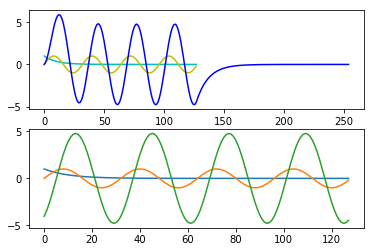

In [7]:
# Computing convolution via the frequency domain
# Calculate the spectrum X(f)=F{x(t)} and Y(f)=F{y(t)}. Calculate the elementwise product Z(f)=X(f)⋅Y(f)
# Perform inverse Fourier transform to get back to the time domain z(t)=F−1{Z(f)}

# Ex: We take two sequences of length N=128, one being the exponential impulse and the other one being a sine wave 
# calculate the convolution once in time domain and once in the frequency domain:

import matplotlib.pyplot as plt
%matplotlib inline

N = 128
n = np.arange(N)

x_samples = np.exp(-0.1*n)
y_samples = np.sin(2*np.pi*n/32) # output 4 full waves for an easy view
z_samples = np.convolve(x_samples, y_samples)

# Application of the convolution theorem: Taking the fft of both signals, multiplying them, then taking the ifft.
z2_samples = np.fft.ifft(np.fft.fft(x_samples) * np.fft.fft(y_samples)).real

plt.subplot(2,1,1)
plt.plot(x_samples, 'c')
plt.plot(y_samples, 'y')
plt.plot(z_samples, 'b')

plt.subplot(2,1,2)
plt.plot(x_samples)
plt.plot(y_samples)
plt.plot(z2_samples)


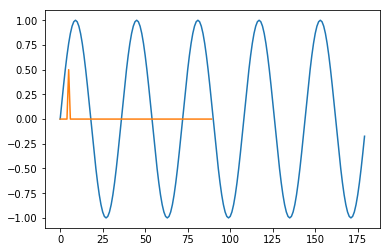

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frequency = 5 # show 5 full waves
t = np.arange(0,1,1/180) # take 180 data for a smooth sampling
signal = np.sin(2* np.pi* frequency*t) # create a sin sample wave
plt.plot(signal) # plot the sin wave

Y = np.fft.fft(signal) / len(signal) # take the fft
Y = np.abs(Y[:(len(signal)//2)]) # take the half and the abs value
plt.plot(np.arange((len(t)//2)), Y, '-') # view the peak at 5

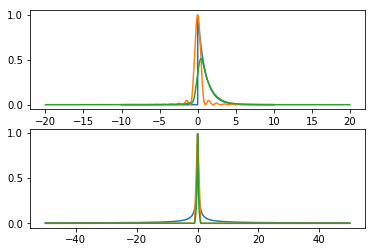

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fs = 100    # the sampling frequency
T = 10      # the time duration for observation
t = np.arange(-T, T, 1/Fs)  # the corresponding samples

# define our two functions
x = lambda t: np.exp(-abs(t)) * (t>=0)
y = lambda t: np.sinc(t)**2

# the resulting time range, when convolving both signals
t_conv = np.arange(-2*T, 2*T, 1/Fs)[:-1]

plt.subplot(2,1,1) 
plt.plot(t, x(t))
plt.plot(t, y(t))
z = np.convolve(x(t), y(t))/Fs
plt.plot(t_conv, z)

# function to calculate the spectrum of the input signal
spec = lambda x: abs(np.fft.fftshift(np.fft.fft(x, 4*len(t))))/Fs
X = spec(x(t))
Y = spec(y(t))
Z = spec(z)
f = np.linspace(-Fs/2, Fs/2, len(X))

plt.subplot(2,1,2)
plt.plot(f, X)
plt.plot(f, Y)
plt.plot(f, Z)